In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from bioinfokit.visuz import cluster


In [2]:

pip install bioinfokit

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [4]:
df = pd.read_csv("Downloads\mcdonalds.csv")


# Step 4: Exploring Data

In [5]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
df.shape

(1453, 15)

In [7]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 90.9+ KB


In [9]:
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [10]:
# To convert the first 11 column entry values to binary values of 0 and 1
binary_data = df.iloc[:,0:11].replace('Yes',1).replace('No',0)
mean = round(binary_data.mean(),2)
print(mean)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [74]:
# To perform PCA
binary_pca = PCA()
pca_binary_data = binary_pca.fit_transform(binary_data)
binary_pca.fit(binary_data)
# To Calculate the proportion of variance given by each principal components,
variance = binary_pca.explained_variance_ratio_
# To Calculate the standard deviation of the principal components,
std = np.sqrt(binary_pca.explained_variance_)
li = []
for j in range(len(std)):
    j = j + 1
    li.append("PC{}".format(j))

sum_ = pd.DataFrame({ "Standard deviation": std, "Proportion of Variance": variance, "Cumulative Proportion": variance.cumsum()
}, index=li)
sum_


,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [12]:
# to print the standard deviations,
print("Standard Deviations:\n", std.round(1))

Standard Deviations:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [47]:
# to print the Variance,
print("\nProportion of Variance:")
print(np.round(binary_pca.explained_variance_ratio_, 1))



Proportion of Variance:
[0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]


In [48]:
# to print the Cumulative Proportion,
print("\nCumulative Proportion:")
print(np.round(np.cumsum(binary_pca.explained_variance_ratio_), 1))


Cumulative Proportion:
[0.3 0.5 0.6 0.7 0.8 0.8 0.9 0.9 0.9 1.  1. ]


In [15]:
# To Create a rotation matrix,
rotation_matrix = binary_pca.components_.T
rotation_df = pd.DataFrame(rotation_matrix, index= binary_data.columns.values, columns=index)
rotation_df = round(-rotation_df, 3)
rotation_df



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


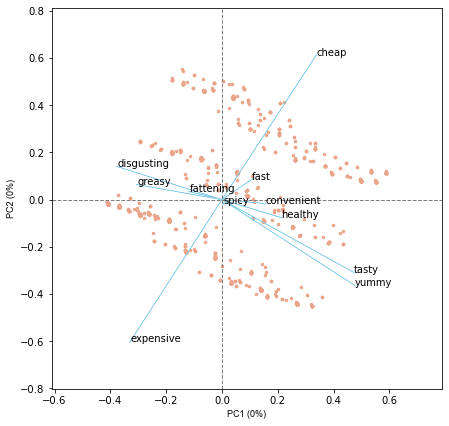

In [16]:
# To Calculate the factor loadings
load = (binary_pca.components_)
i = 0
cluster.biplot(cscore=pca_binary_data, loadings=-load, labels=df.columns.values,var1=0,var2=0, show=True, dim=(8,8))

# Step 5: Extracting Segments

## Using k-Means

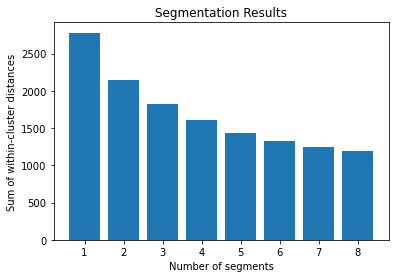

In [50]:
np.random.seed(1234)
# number of repetitions
no_repition = 10
#number of segments
no_segments = range(1, 9)
disatnces_cluster = []
binary_k_means = {}
for k in no_segments:
    kmeans = KMeans(n_clusters=k, n_init=no_repition, random_state=1234)
    kmeans.fit(binary_data)
    #To calculate the cluster distances
    disatnces_cluster.append(kmeans.inertia_)
    binary_k_means[str(k)] = kmeans
# to plot 
plt.bar(no_segments, disatnces_cluster)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

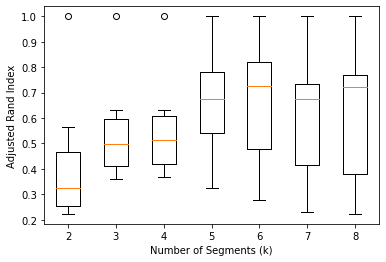

In [55]:
# k-Means clustering 
final = {}
for k in range(2,9):
    kmeans_model = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans_labels = kmeans_model.fit_predict(binary_data)
    final[str(k)] = kmeans_labels
    df['Cluster Number'] = kmeans_labels
# Calculating adjusted rand index 
val = []
for i in range(2, 9):
    val.append([adjusted_rand_score(final[str(i)], final[str(j)]) for j in range(2, 9)])

val = np.array(val)

# Create a box plot
plt.boxplot(val, labels=list(range(2, 9)))
plt.xlabel('Number of Segments (k)')
plt.ylabel('Adjusted Rand Index')
plt.show()

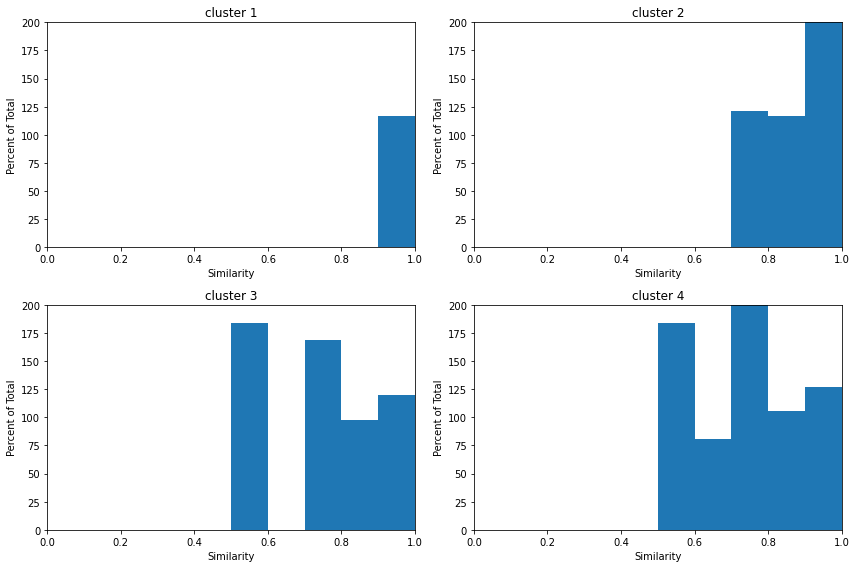

In [59]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i in range(1, 5):
    labels = binary_k_means[str(i)].predict(binary_data)
    sim = binary_k_means[str(i)].transform(binary_data).min(axis=1)
    # histogram 
    row = (i - 1) // 2
    col = (i - 1) % 2
    axs[row, col].hist(sim, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Percent of Total')
    axs[row, col].set_title('cluster {}'.format(i)
    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)
    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.tight_layout()
plt.show()
     

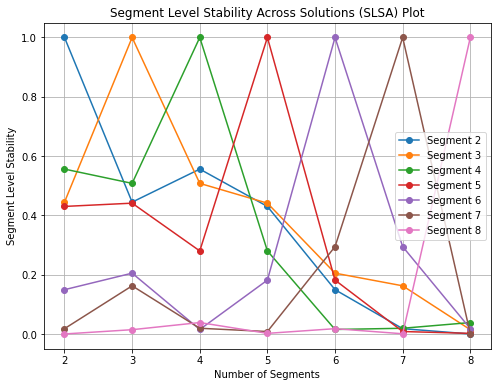

In [56]:
number_of__segments = range(2, 9)
stability = []
for i in range(2, 9):
    labels_segment = binary_k_means[str(i)].predict(binary_data)
    stability.append(labels_segment)
plt.figure(figsize=(8, 6))
for i, j in enumerate(range(2, 9)):
    plt.plot(number_of__segments, [np.mean(stability[i] == labels)
    for labels in stability], marker='o', label=f'Segment {j}')
plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)
plt.show()
     

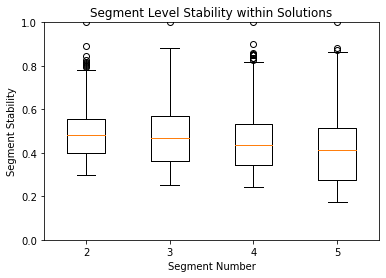

In [57]:
solutions = ["2", "3", "4", "5"]

segment_wise_labels = {}

segment_wise_similarities = {}
for i in solutions:
    segment_wise_labels[i] = binary_k_means[i].predict(binary_data)
    segment_wise_similarities[i] = binary_k_means[i].transform(binary_data).min(axis=1)
stability_values = []

for i in solutions:
    similarities = segment_wise_similarities[i]

    # Normalize 
    normalized = similarities / np.max(similarities)
    stability_values.append(normalized)
# plot
plt.boxplot(stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")

plt.xticks(range(1, len(solutions) + 1), solutions)

plt.ylim(0, 1)

plt.title("Segment Level Stability within Solutions")

plt.show()

In [61]:
from scipy.stats import entropy
np.random.seed(12345)
k = range(2, 9)
#  for different k-values
bianry_k_values__ = []
for i in k:
    # Create a KMeans model 
    model = KMeans(n_clusters=i, random_state=12345)
    model.fit(binary_data.values)
    # number of iterations 
    iter_val = model.n_iter_
    converged = True
    k_value = i
    ki_value = i
    log = -model.inertia_
    # To Get the number of samples and features in the data
    no_samples, _ = binary_data.shape
    # To Calculate the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)
    aic = -2 * log + 2 * i
    bic = -2 * log + np.log(n_samples) * i

    # cluster labels 
    labels = model.labels_

    # number of samples in each cluster and calculate the probability of each cluster
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())

    # entropy of the cluster probabilities
    class_entropy = entropy(probs)

    # Integrated Completed Likelihood (ICL)
    icl = bic - class_entropy

    # Append the evaluation metrics 
    bianry_k_values__.append((iter_val, converged, k_value, ki_value, log, aic, bic, icl))

# Create a DataFrame 
bianry_k_values__ = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(bianry_k_values__)


   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     8       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     9       True  3   3 -1818.909833  3643.819667  3659.663824  3658.594825
2     8       True  4   4 -1602.930346  3213.860691  3234.986234  3233.658374
3     6       True  5   5 -1434.859229  2879.718459  2906.125387  2904.533283
4     7       True  6   6 -1355.872316  2723.744632  2755.432946  2753.702263
5    13       True  7   7 -1248.233345  2510.466691  2547.436390  2545.529889
6     5       True  8   8 -1200.917049  2417.834098  2460.085184  2458.072685


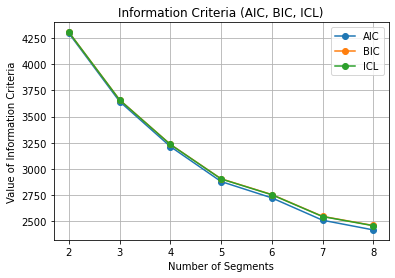

In [62]:
# To Extract the number of segments (k-values) and corresponding AIC, BIC, and ICL values from the bianry_k_values__ DataFrame
number_of_segments = bianry_k_values__["k"]
AIC_values = bianry_k_values__["AIC"]
BIC_values = bianry_k_values__["BIC"]
ICL_values = bianry_k_values__["ICL"]

plt.plot(number_of_segments, AIC_values, marker='o', label='AIC')
plt.plot(number_of_segments, BIC_values, marker='o', label='BIC')
plt.plot(number_of_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')


plt.legend()
plt.grid(True)
plt.show()

In [64]:
from sklearn.mixture import GaussianMixture

# Set the number of clusters (segments) to 4
k = 4

# KMeans clustering 
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(binary_data)
kmeans_clusters = kmeans.predict(binary_data)

# To Perform Gaussian Mixture Model (GMM) 
Gaussian = GaussianMixture(n_components=k, random_state=1234)
Gaussian.fit(binary_data)
Gaussian_clusters = Gaussian.predict(binary_data)
final = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': Gaussian_clusters})
dat = binary_data[final['mixture'] == 3]

# KMeans clustering 
kmeans_4 = KMeans(n_clusters=k, random_state=1234)
kmeans_4.fit(dat)
kmeans_4_clusters = kmeans_4.predict(dat)


results_4 = pd.DataFrame({'kmeans': kmeans_4_clusters, 'mixture': 3})

# cross-tabulation of KMeans and GMM cluster 
print(pd.crosstab(final['kmeans'], final['mixture']))


print(pd.crosstab(final['kmeans'], results_4['kmeans']))



mixture    0    1    2    3
kmeans                     
0          0  340    0  186
1          0   49  259   65
2        199    1   35    4
3        256    2    0   57
kmeans   0   1   2   3
kmeans                
0       55  20  20  14
1       47  17  14   5
2       26  15   6   3
3       42  11  10   7


In [66]:

Gaussian_m = GaussianMixture(n_components=4)
Gaussian_m.fit(binary_data)

log_m_ = Gaussian_m.score(binary_data)

Gaussian_m_ = GaussianMixture(n_components=4)
Gaussian_m_.fit(binary_data)

log_m = Gaussian_m_.score(binary_data)


print("Log-likelihood for Gaussian_m:", log_m_)
print("Log-likelihood for Gaussian_m_:", log_m)


Log-likelihood for Gaussian_m: 11.15131671484581
Log-likelihood for Gaussian_m_: 12.11593850222996


# Using Mixtures of Regression Models

In [67]:

likely_counts = pd.value_counts(df['Like'])

# Reverse the order
reversed_order_counts = likely_counts.iloc[::-1]
# create dataframe
reversed_df = pd.DataFrame(reversed_order_counts)
reversed_df

,Like
-1,58
-2,59
-4,71
-3,73
I love it!+5,143
I hate it!-5,152
+1,152
+4,160
0,169
+2,187


# Step 6: Profiling Segments

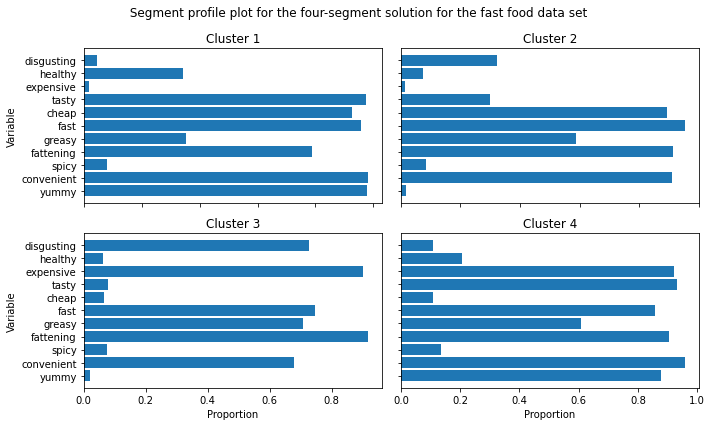

In [72]:
#  k-means model with 4 clusters 
kmeans = binary_k_means['4']

# cluster labels 
labels = kmeans.labels_

binary_mean = binary_data.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0, 0].barh(range(binary_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Cluster 1')
axs[0, 1].barh(range(binary_mean.shape[1]), binary_mean.iloc[1])
axs[0, 1].set_title('Cluster 2')
axs[1, 0].barh(range(binary_mean.shape[1]), binary_mean.iloc[2])
axs[1, 0].set_title('Cluster 3')
axs[1, 1].barh(range(binary_mean.shape[1]), binary_mean.iloc[3])
axs[1, 1].set_title('Cluster 4')
for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(binary_mean.shape[1]))
    ax.set_yticklabels(binary_data.columns)
for ax in axs.flat:
    ax.label_outer()

fig.suptitle(' Segment profile plot for the four-segment solution for the fast food data set')
fig.tight_layout()
plt.show()

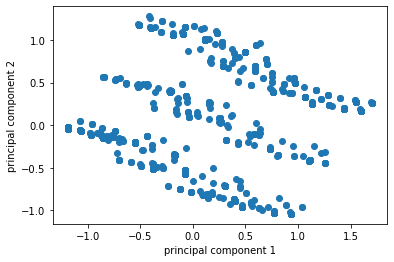

In [73]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(binary_data)

pca = PCA(n_components=2)

binary_data_pca = pca.fit_transform(binary_data)

fig, ax = plt.subplots()
ax.scatter(binary_data_pca[:, 0], binary_data_pca[:, 1])

ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')

plt.show()

#  Step 7: Describing Segments

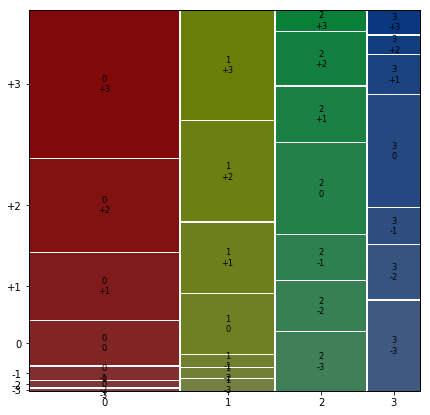

Like,-3,-2,-1,0,+1,+2,+3
cluster_num,,,,,,,
0,2,6,13,43,65,90,143
1,7,6,7,36,42,60,66
2,34,29,26,53,32,31,12
3,30,18,12,37,13,6,8


None

In [80]:
df['cluster_num'] = kmeans.labels_
# crosstab creation
tab = pd.crosstab(df['cluster_num'], df['Like'])
tab = crosstab[['-3','-2','-1','0','+1','+2','+3']]
tab

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,7)
mosaic(tab.stack())
display(tab, plt.show())

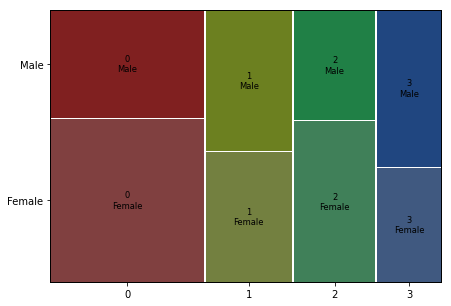

Like,-3,-2,-1,0,+1,+2,+3
cluster_num,,,,,,,
0,2,6,13,43,65,90,143
1,7,6,7,36,42,60,66
2,34,29,26,53,32,31,12
3,30,18,12,37,13,6,8


None

In [82]:
tab_gender = pd.crosstab(df['cluster_num'],df['Gender'])
tab_gender

# plotting mosaic plot
plt.rcParams['figure.figsize'] = (7,5)
mosaic(tab_gender.stack())
display(tab, plt.show())

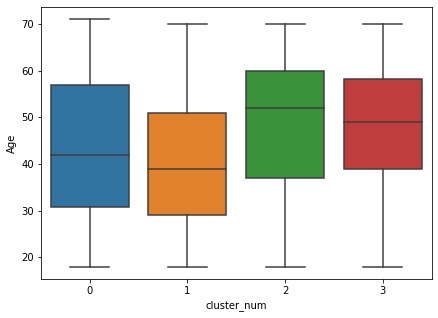

In [83]:

# box plot for 'Age'
sns.boxplot(x="cluster_num", y="Age", data=df);

#  Step 8: Selecting (the) Target Segment(s)

In [86]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit_freq = df.groupby('cluster_num')['VisitFrequency'].mean()
visit_freq = visit_freq.to_frame().reset_index()
visit_freq

,cluster_num,VisitFrequency
0,0,2.584483
1,1,2.540123
2,2,2.809061
3,3,2.679167


In [87]:
# calculating the mean of 'Like'
df['Like'] = LabelEncoder().fit_transform(df['Like'])
like = df.groupby('cluster_num')['Like'].mean()
like = like.to_frame().reset_index()
like

,cluster_num,Like
0,0,3.794828
1,1,3.808642
2,2,5.423948
3,3,6.775000


In [88]:

# calculating the mean of 'Gender'
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.398276
1,1,0.521605
2,2,0.407767
3,3,0.579167


In [90]:

segment = Gender.merge(like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.398276,3.794828,2.584483
1,1,0.521605,3.808642,2.540123
2,2,0.407767,5.423948,2.809061
3,3,0.579167,6.775000,2.679167


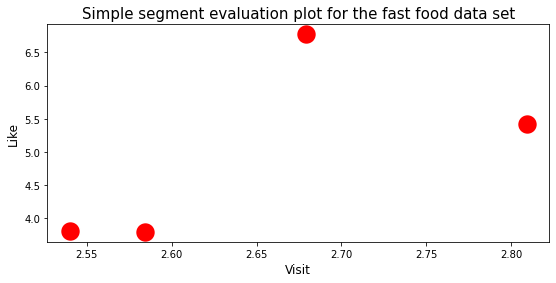

In [91]:

# targeting segments
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()
     